# Data Exploration
Until now, we are having pretty poor results with our models. Instead of trying to tweak the model again, let's learn about data exploration process.

Usually, this is done before even starting to build a model. Exploration will help you to decide how you should preprocess the text and may give you important insights about your data.

Let's begin by downloading our data and importing packages.

In [1]:
# imports
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

import numpy as np
import pandas as pd

# get data
!wget --no-check-certificate \
    -O /tmp/sentiment.csv https://drive.google.com/uc?id=13ySLC_ue6Umt9RJYSeM2t-V0kCv-4C-P

# define get_data function
def get_data(path):
  data = pd.read_csv(path, index_col=0)
  return data

#get the data
data = get_data('/tmp/sentiment.csv')

# clone package repository
!git clone https://github.com/vallantin/atalaia.git

# navigate to atalaia directory
%cd atalaia

# install packages requirements
!pip install -r requirements.txt

# install package
!python setup.py install

# import it
from atalaia.atalaia import Atalaia

--2020-07-09 18:56:44--  https://drive.google.com/uc?id=13ySLC_ue6Umt9RJYSeM2t-V0kCv-4C-P
Resolving drive.google.com (drive.google.com)... 172.217.219.102, 172.217.219.138, 172.217.219.113, ...
Connecting to drive.google.com (drive.google.com)|172.217.219.102|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-08-ak-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/2j4ljskr2h8gs7ggko821vnjj9qptmnh/1594320975000/11118900490791463723/*/13ySLC_ue6Umt9RJYSeM2t-V0kCv-4C-P [following]
--2020-07-09 18:56:45--  https://doc-08-ak-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/2j4ljskr2h8gs7ggko821vnjj9qptmnh/1594320975000/11118900490791463723/*/13ySLC_ue6Umt9RJYSeM2t-V0kCv-4C-P
Resolving doc-08-ak-docs.googleusercontent.com (doc-08-ak-docs.googleusercontent.com)... 108.177.111.132, 2607:f8b0:4001:c07::84
Connecting to doc-08-ak-docs.googleusercontent.com (doc-08-ak-docs.googleusercontent.com)|1

Now, let's check a few basic stats for this data.

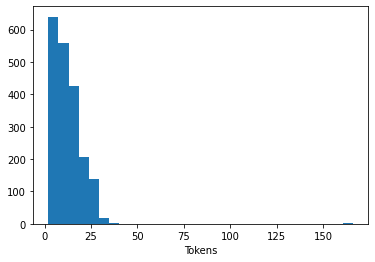

In [2]:
# get a list with all the texts
texts = data.text
#start atalaia
atalaia = Atalaia('en')

# get the number of tokens in each sentence
# get the lengths
lens = [len(atalaia.tokenize(t)) for t in texts]
# plot
plt.hist(lens, bins=30)
plt.xlabel('Tokens');

Most of the sentences are short. They range between ~5 and 25 tokens.
 
Use bloxplot to better visualize the size of the sentences and to spot outliers. 

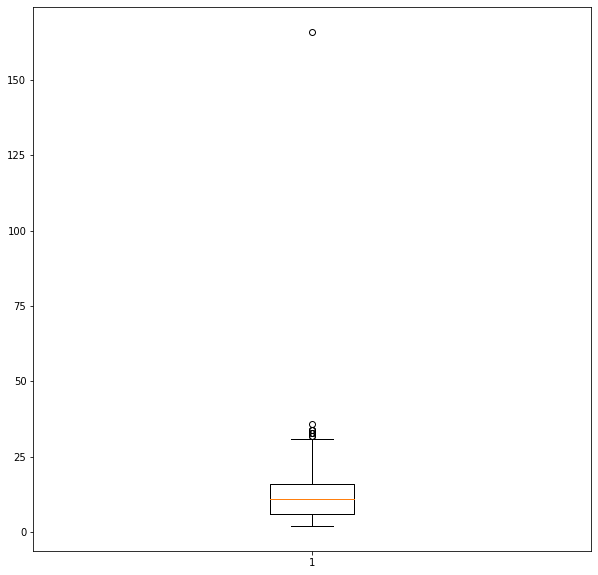

In [3]:
plt.figure(figsize=(10,10))
plt.boxplot(lens)
plt.show()

Which words account for 30% of the text?

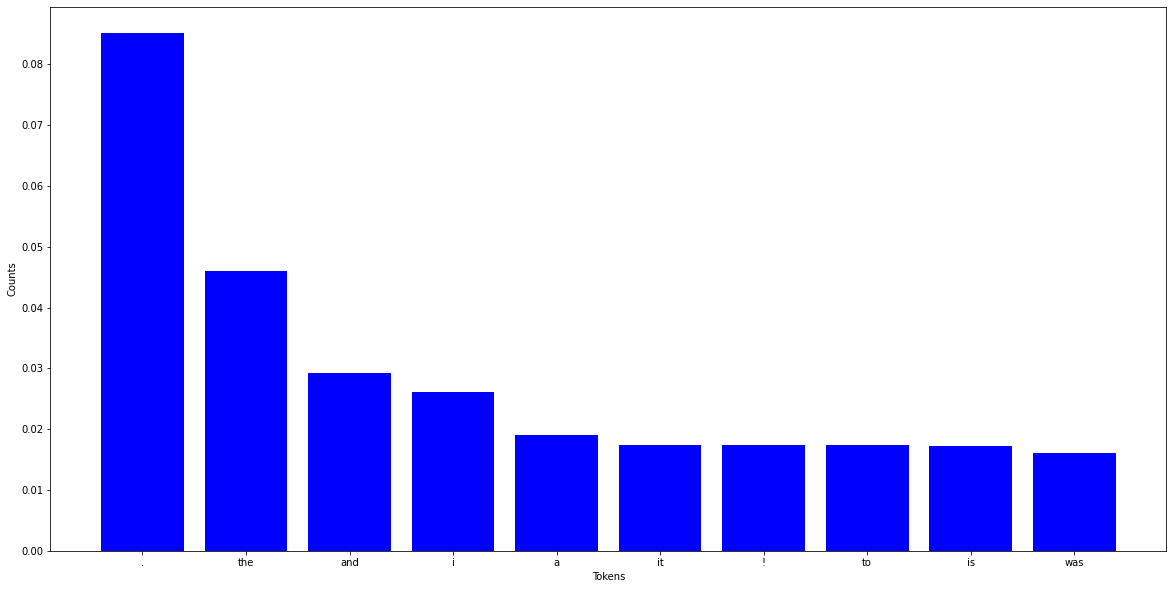

In [4]:
#create corpus
corpus = atalaia.create_corpus(texts)
# let's lowercase everything first
texts_lower = atalaia.lower_remove_white(corpus)
# plot
token_data = atalaia.representative_tokens(0.3, 
                                           texts_lower,
                                           reverse=False)

token_data     = token_data.items()
token_data     = list(token_data)[:10]
tokens, counts = zip(*token_data)

# plot
plt.figure(figsize=(20,10))
plt.bar(tokens, 
        counts, 
        color='b')
plt.xlabel('Tokens');
plt.ylabel('Counts');

If we remove the stopwords, which words are the most representative?

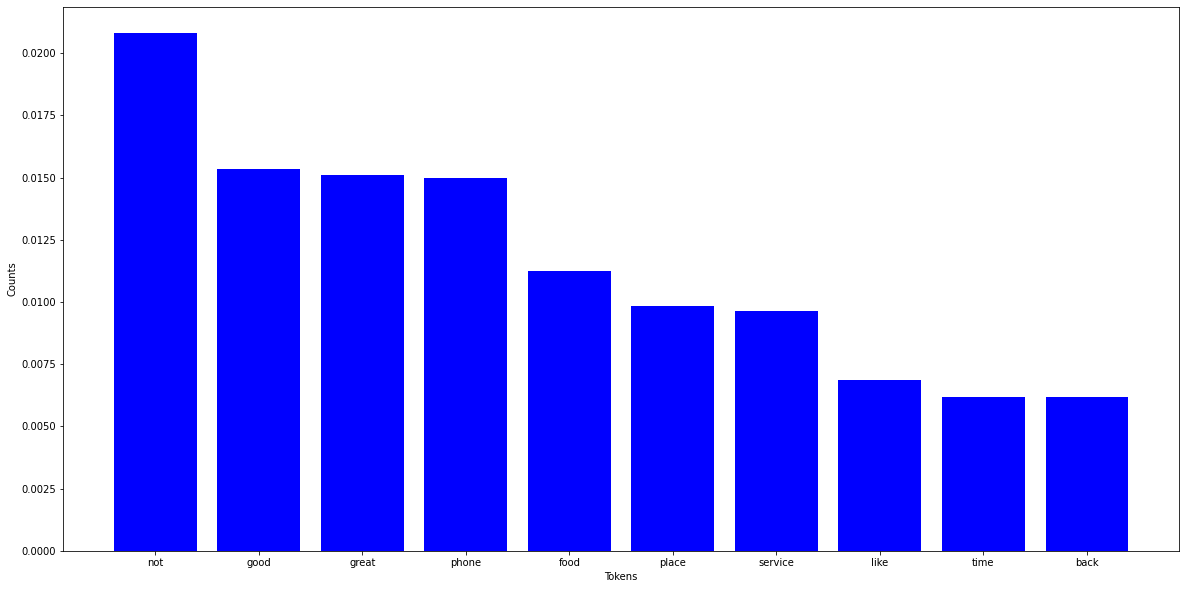

In [5]:
# let's remove the stop words...
texts_no_stopwords = atalaia.remove_stopwords(texts_lower)
# and the punctuation.
texts_no_stopwords = atalaia.remove_punctuation(texts_no_stopwords)

token_data_no_stop = atalaia.representative_tokens(0.3, 
                                                   texts_no_stopwords,
                                                   reverse=False)

token_data_no_stop = token_data_no_stop.items()
token_data_no_stop = list(token_data_no_stop)[:10]
tokens, counts     = zip(*token_data_no_stop)

# plot
plt.figure(figsize=(20,10))
plt.bar(tokens, 
        counts, 
        color='b')
plt.xlabel('Tokens');
plt.ylabel('Counts');

We start to see some words carrying sentiments with them, like "good" or "great". Not itself is not a good way to determinate sentiment, as it may change the next word meaning. Example:

This is not bad -> Good sentiment

This is not good -> Bad sentiment

What about hapaxes? These are words that occurs only once within a context. In this case, we will look for hapaxes in the whole corpus. Do we have them?

In [6]:
hapaxes = atalaia.hapaxes(texts_no_stopwords)
print('Found {} hapaxes. Showing the first 50.'.format(len(hapaxes)))
hapaxes[:50]

100%|██████████| 11197/11197 [00:00<00:00, 1231283.67it/s]

Found 1805 hapaxes. Showing the first 50.


['converter',
 'tied',
 'major',
 'jiggle',
 'dozen',
 'hundred',
 'seperated',
 'mere',
 'ft',
 'excessive',
 'garbled',
 'odd',
 'fooled',
 'clicks',
 'wonder',
 'mechanism',
 'followed',
 'directions',
 'kindle',
 'commercials',
 'misleading',
 'mother',
 'couldnt',
 'earphone',
 'breakage',
 'unacceptible',
 'ideal',
 'whose',
 'sensitive',
 'moving',
 'freeway',
 'speed',
 'contract',
 'ac',
 'highy',
 'mins',
 '680',
 '2mp',
 'pics',
 'garbage',
 'gonna',
 'arguing',
 'bulky',
 'usable',
 'useful',
 'machine',
 'gadget',
 'e',
 'stream',
 'submerged']

Texts from internet are sometimes mispelled. Some of them can result in hapaxes, like "unacceptible" and "couldnt".

Another way to visualize things is using wordclouds.

In [7]:
def preprocess(texts):
  # preprocess 
  texts = list(texts)
  # lower
  texts = [atalaia.lower_remove_white(t) for t in texts]
  # remove punctuation
  texts = [atalaia.remove_punctuation(t) for t in texts]
  # remove numbers
  texts = [atalaia.remove_numbers(t) for t in texts]
  # remove stopwords
  texts = [atalaia.remove_stopwords(t) for t in texts]
  # tokenize 
  texts = [atalaia.tokenize(t) for t in texts]

  return texts

texts_preprocessed = preprocess(texts)
# preview
texts_preprocessed[:5]

[['no', 'way', 'plug', 'us', 'unless', 'go', 'converter'],
 ['good', 'case', 'excellent', 'value'],
 ['great', 'jawbone'],
 ['tied',
  'charger',
  'conversations',
  'lasting',
  'minutes',
  'major',
  'problems'],
 ['mic', 'great']]

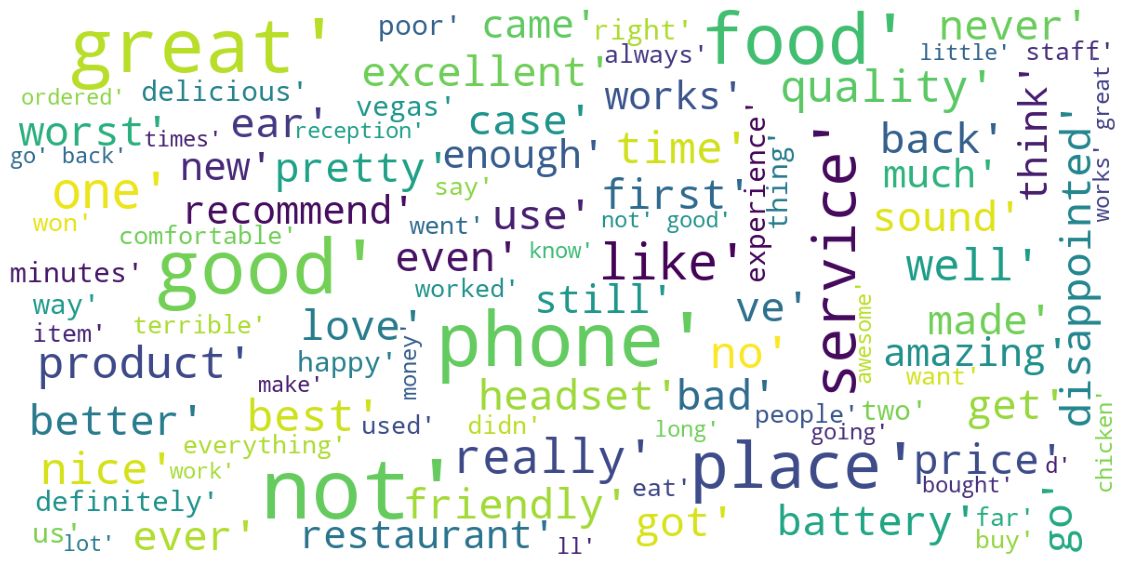

In [8]:
# wordcloud
def gen_wordcloud(texts_preprocessed):
  wordcloud = WordCloud(background_color='white',
                        max_words=100,
                        max_font_size=30,
                        scale=3,
                        random_state=1)
    
  wordcloud=wordcloud.generate(str(texts_preprocessed))
  fig = plt.figure(1, figsize=(20, 12))
  plt.axis('off')
  plt.imshow(wordcloud)
  plt.show()

# generate wordcloud
gen_wordcloud(texts_preprocessed)